# Notebook 3: Classification Using Machine Learning

In this notebook, we will use a classical machine learning method to classify the astronomical data saved in the previous notebook.

---

### Reading the data

First, we’ll load the saved image and label data from the NumPy files.

In [1]:
import numpy as np  # Importing NumPy for numerical operations and array handling

# Load the training images and labels back from the saved NumPy files
train_images = np.load('train_images.npy')  # Load image training data
train_labels = np.load('train_labels.npy')  # Load label training data


print("Training Data loaded successfully from NumPy files.")

Training Data loaded successfully from NumPy files.


In [2]:
print(train_images.shape)

(9600, 512, 512, 3)


In [3]:
train_labels.shape

(9600,)

---

## Pre-processing

Now, we will further pre-process the trainig images to simplify the data.

### Normalisation

In [4]:
# Step 1: Normalize the training data

# Scaling pixel values to be between 0 and 1
train_images_pre = train_images.astype('float32') / 255.0

##### **⚠️ Freeing up Space**

In [5]:
import gc

# Since we will no longer need the original training data (train_images), we can remove it from memory
del train_images

# Force garbage collection to free up memory
gc.collect()

print("train_images removed from memory.")

train_images removed from memory.


### Grayscaling

In [6]:
#Step 2: Convert images to grayscale, transforming them from RGB (3 channels) to a single channel (grayscale).

from skimage.color import rgb2gray

# Apply grayscale conversion to each image
train_images_pre = np.array([rgb2gray(image) for image in train_images_pre])

### Downscaling

In [7]:
# Step 3: Downscale images to 64x64 pixels from 512x512

from skimage.transform import resize

# Resize images to 64x64 pixels
train_images_pre = np.array([resize(image, (64, 64), anti_aliasing=True) for image in train_images_pre])

### Now, Visualizing the 5 classes after pre-processing

In [8]:
print(train_labels)

[2 4 4 ... 4 0 1]


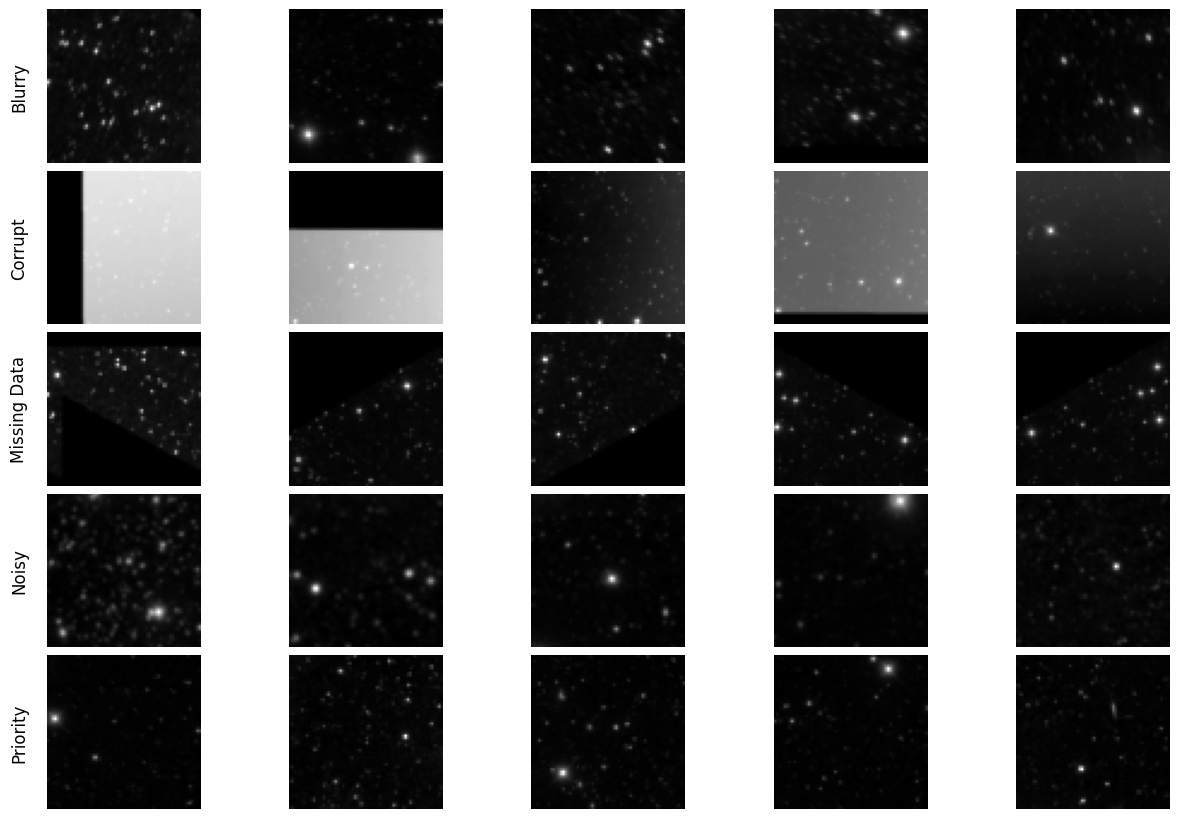

In [9]:
import matplotlib.pyplot as plt
import numpy as np  # Ensure NumPy is imported

# Set the random seed for reproducibility
np.random.seed(42)

# Class names as a list
class_names = ['Blurry', 'Corrupt', 'Missing Data', 'Noisy', 'Priority']

# Number of images per class to display
num_images_per_class = 5

# Prepare the figure with appropriate size
fig, axes = plt.subplots(nrows=5, ncols=num_images_per_class, figsize=(15, 10))

for class_index, class_name in enumerate(class_names):
    # Get indices of images belonging to the current class
    indices = np.where(train_labels == class_index)[0]
    # Randomly select image indices using the fixed seed
    selected_indices = np.random.choice(indices, size=num_images_per_class, replace=False)
    for i, img_index in enumerate(selected_indices):
        # Get the corresponding image
        img = train_images_pre[img_index]
        # Access the appropriate axes
        ax = axes[class_index, i]
        # Display the image
        ax.imshow(img, cmap='gray')
        # Turn off axis ticks and labels
        ax.set_xticks([])
        ax.set_yticks([])
        # Remove the frame
        for spine in ax.spines.values():
            spine.set_visible(False)
    # Set the class label on the left of the row
    axes[class_index, 0].set_ylabel(class_name, rotation=90, size='large', labelpad=20, va='center')

# Adjust the subplot parameters to make room for the labels
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.05, hspace=0.05)

plt.show()

After reviewing the pre-processed images, it appears that reducing the size from 512x512 to 64x64 may not have been the best choice. Visually, it has become more challenging to distinguish between the **Priority**, **Noisy**, and **Blurry** categories. Now, let’s apply a machine learning method to classify these images.

---

## ML Classification

In [10]:
# First, let us Flatten the training images
num_train_samples = train_images_pre.shape[0]
train_images_pre = train_images_pre.reshape(num_train_samples, -1)

### Train the Stochastic Gradient Descent (SGD) Model

The Stochastic Gradient Descent (SGD) model refers to algorithms that use the stochastic gradient descent optimization method to train machine learning models. The SGDClassifier is a powerful tool for training linear models efficiently, especially when dealing with large datasets. Its speed comes from updating model parameters incrementally using individual samples or small batches, significantly reducing the computational overhead per iteration compared to traditional gradient descent methods.

In [11]:
from sklearn.linear_model import SGDClassifier
import pickle

# Create the stochastic gradient descent model

sgd_model = SGDClassifier( loss='log_loss', max_iter=10000, n_jobs=4, random_state=42)

# Fit the model on the training data
sgd_model.fit(train_images_pre, train_labels)

# Save the model to a file
with open('sgd_model.pkl', 'wb') as file:
    pickle.dump(sgd_model, file)

---

##### **⚠️ Freeing up Space**

In [ ]:
import gc

# Remove the data from memory
del train_images_pre, train_labels

# Force garbage collection to free up memory
gc.collect()

print("Data removed from memory.")